In [40]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px


Read csv file

In [41]:
df = pd.read_csv("drinkMenu.csv")
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


Data Preparation and Cleaning

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [43]:
df.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

Data doesn't have nulls

In [44]:
#check for duplicates
df.duplicated().sum()


0

no duplicates in data

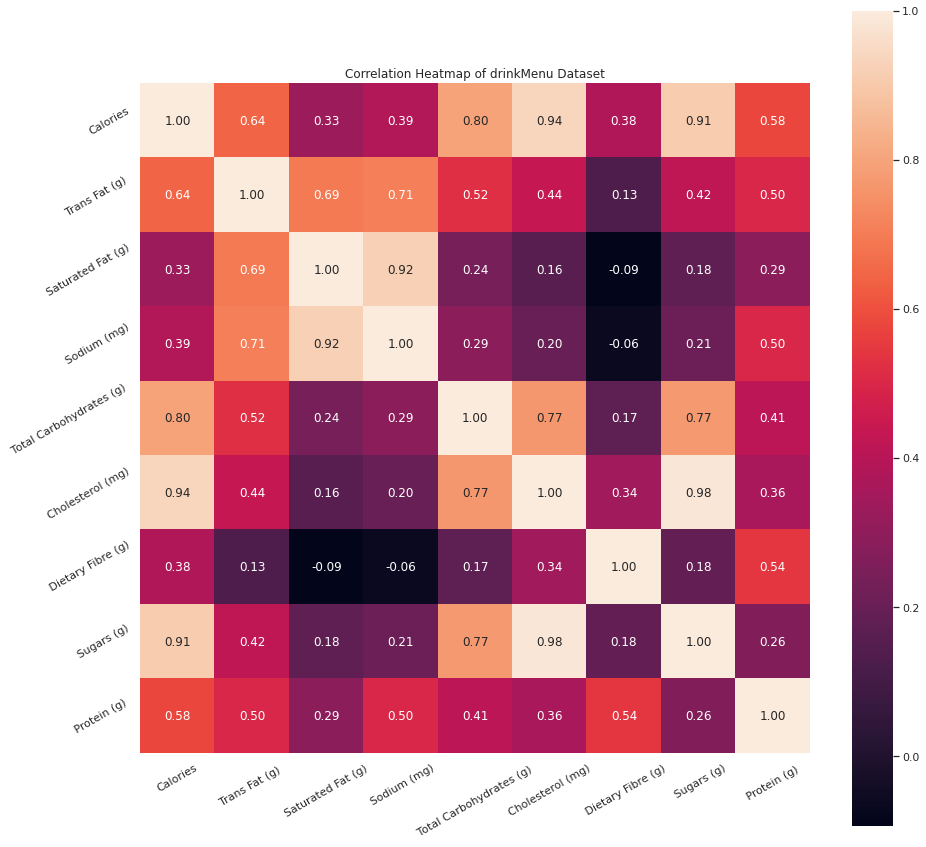

In [45]:
#checking data correlation to make sure that there is no unnecessary data/columns
corr_matrix = df.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of drinkMenu Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

Assuming our threshold is 90% correlation then:
sodium and saturated fats, sugars, cholestrol and colories are strongly correlated, we can keep either one



In [46]:
corr_features = []
for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname = corr_matrix.columns[i]
            if colname not in corr_features:
                corr_features.append(colname)

corr_features

[' Sodium (mg)', 'Cholesterol (mg)', ' Sugars (g)']

In [47]:
df_cleaned = df.drop(labels=corr_features, axis=1)


In [48]:
df_cleaned.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Total Carbohydrates (g),Dietary Fibre (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,5,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,10,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,10,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,10,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,75,0,6.0,10%,0%,20%,0%,75


In [49]:
#remove spaces to easily retrieve columns
df.columns = df.columns.str.replace(' ','')
df

,Beverage_category,Beverage,Beverage_prep,Calories,TotalFat(g),TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV),Caffeine(mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


**Data Visualization**

Which drink has the highest calories from the dataset?

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

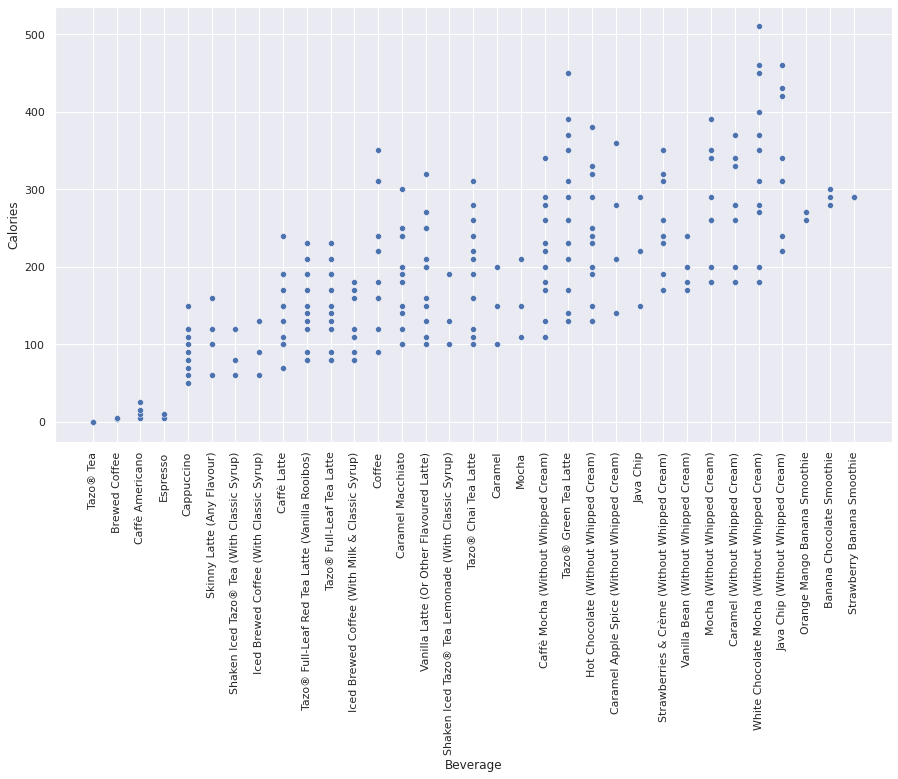

In [52]:
sns.set(rc = {'figure.figsize':(15,8)})
fig = sns.scatterplot(data=df.sort_values(by=['Calories']), x="Beverage", y="Calories")
plt.setp(fig.get_xticklabels(), rotation=90)


White Chocolate Mocha (Without Whipped Cream) has highest calories




In [53]:
#double check answer
answer = df[df['Calories'] == df['Calories'].max()]
answer

,Beverage_category,Beverage,Beverage_prep,Calories,TotalFat(g),TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV),Caffeine(mg)
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150


Highest Sugar Drink ?

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

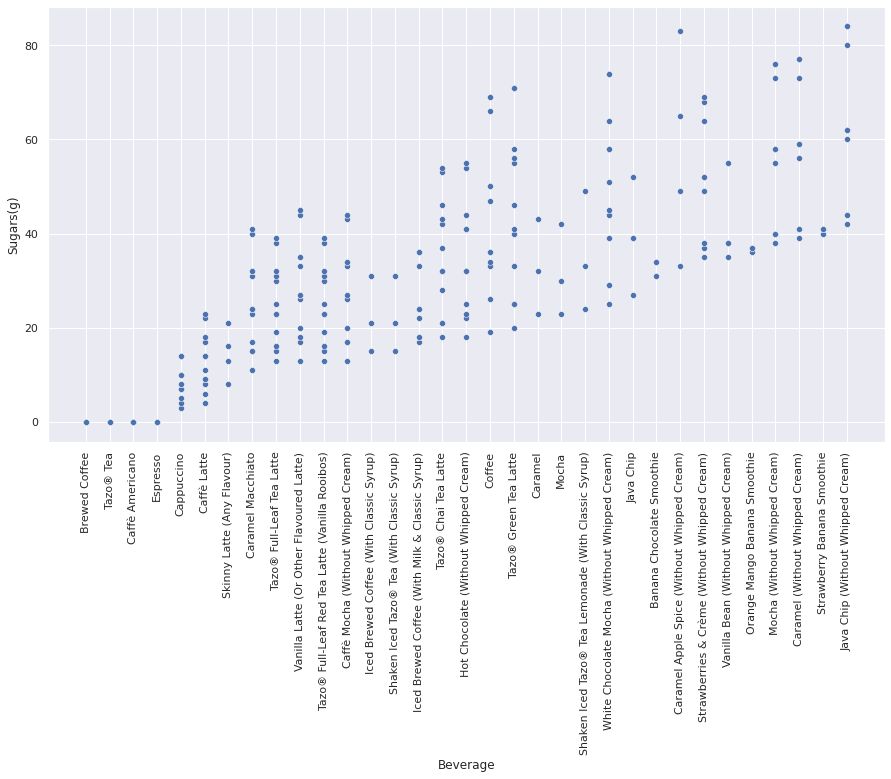

In [54]:
sns.set(rc = {'figure.figsize':(15,8)})
fig = sns.scatterplot(data=df.sort_values(by=['Sugars(g)']), x="Beverage", y="Sugars(g)")
plt.setp(fig.get_xticklabels(), rotation=90)


Java Chip (Without Whipped Cream) has the highest sugar

In [55]:
#double check answer
answer = df[df['Sugars(g)'] == df['Sugars(g)'].max()]
answer

,Beverage_category,Beverage,Beverage_prep,Calories,TotalFat(g),TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV),Caffeine(mg)
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5,4.0,0.0,5,340,90,2,84,7.0,10%,0%,20%,35%,145
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145


Thank you 😀